Exercises and examples from Introduction to Deep Learning by Eugene Charniak

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR) #disable warnings
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [ ]:
# Single layer
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

batchSz = 100
W = tf.Variable(tf.random_normal([784, 10], stddev=0.1))
b = tf.Variable(tf.random_normal([10], stddev=0.1))

img = tf.placeholder(tf.float32, [batchSz,784])
ans = tf.placeholder(tf.float32, [batchSz, 10])

prbs = tf.nn.softmax(tf.matmul(img, W) + b)
xEnt = tf.reduce_mean(-tf.reduce_sum(ans * tf.log(prbs), reduction_indices=[1]))

train = tf.train.GradientDescentOptimizer(0.5).minimize(xEnt)
numCorrect = tf.equal(tf.argmax(prbs, 1), tf.argmax(ans, 1))
accuracy = tf.reduce_mean(tf.cast(numCorrect, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

accs = []

for i in range(1000):
    imgs, anss = mnist.train.next_batch(batchSz)
    acc, ignore = sess.run([accuracy, train], feed_dict={img: imgs, ans: anss})
    accs.append(acc)
    
sumAcc = 0
for i in range(1000):
    imgs, anss = mnist.test.next_batch(batchSz)
    sumAcc += sess.run(accuracy, feed_dict={img: imgs, ans: anss})
print("Test Accuracy: %r" % (sumAcc/1000))

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(accs)
ax.set(title='Batch Iteration vs. Accuracy')
plt.show()

In [4]:
# Multiple layers
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

batchSz = 100

img = tf.placeholder(tf.float32, [batchSz, 784])
ans = tf.placeholder(tf.float32, [batchSz, 10])

U = tf.Variable(tf.random_normal([784, 784], stddev=0.1))
bU = tf.Variable(tf.random_normal([784], stddev=0.1))
V = tf.Variable(tf.random_normal([784, 10], stddev=0.1))
bV = tf.Variable(tf.random_normal([10], stddev=0.1))
L1Output = tf.matmul(img, U) + bU
L1Output = tf.nn.relu(L1Output)

prbs = tf.nn.softmax(tf.matmul(L1Output, V) + bV)
xEnt = tf.reduce_mean(-tf.reduce_sum(ans * tf.log(prbs), reduction_indices=[1]))

train = tf.train.GradientDescentOptimizer(0.05).minimize(xEnt)
numCorrect = tf.equal(tf.argmax(prbs, 1), tf.argmax(ans, 1))
accuracy = tf.reduce_mean(tf.cast(numCorrect, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

accs = []
for i in range(1000):
    imgs, anss = mnist.train.next_batch(batchSz)
    acc, ignore = sess.run([accuracy, train], feed_dict={img: imgs, ans: anss})
    accs.append(acc)
    
sumAcc = 0
for i in range(1000):
    imgs, anss = mnist.test.next_batch(batchSz)
    sumAcc += sess.run(accuracy, feed_dict={img: imgs, ans: anss})
print("Test Accuracy: %r" % (sumAcc/1000))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Test Accuracy: 0.9394000025987626


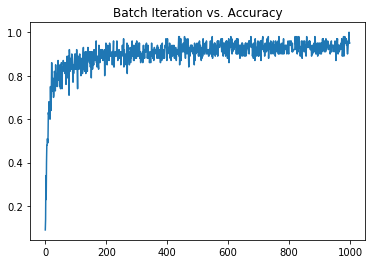

In [6]:
fig, ax = plt.subplots()
ax.plot(accs)
ax.set(title='Batch Iteration vs. Accuracy')
plt.show()